In [1]:
from google.colab import drive

# Mount the drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# File paths for pre-split data
X_train_path = "/content/drive/MyDrive/dataMining/Concrete_Data_X_train.csv"
X_test_path = "/content/drive/MyDrive/dataMining/Concrete_Data_X_test.csv"
y_train_path = "/content/drive/MyDrive/dataMining/Concrete_Data_y_train.csv"
y_test_path = "/content/drive/MyDrive/dataMining/Concrete_Data_y_test.csv"

# Load the datasets
X_train = pd.read_csv(X_train_path)
X_test = pd.read_csv(X_test_path)
y_train = pd.read_csv(y_train_path).values.ravel()  # Flatten y_train to 1D array
y_test = pd.read_csv(y_test_path).values.ravel()    # Flatten y_test to 1D array


In [3]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Models initialization
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf')
}

# Training and evaluation
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[model_name] = {"MSE": mse, "MAE": mae, "R2": r2}

# Display model comparison
results_df = pd.DataFrame(results).T
print(results_df)


                         MSE       MAE        R2
Linear Regression  88.592072  7.105006  0.703038
Ridge Regression   89.933255  7.196982  0.698543
Lasso Regression   90.074066  7.202226  0.698071
Random Forest      24.247618  3.500173  0.918722
XGBoost            19.366472  2.711429  0.935083
SVR                96.320281  7.325161  0.677133


Best Model: XGBoost


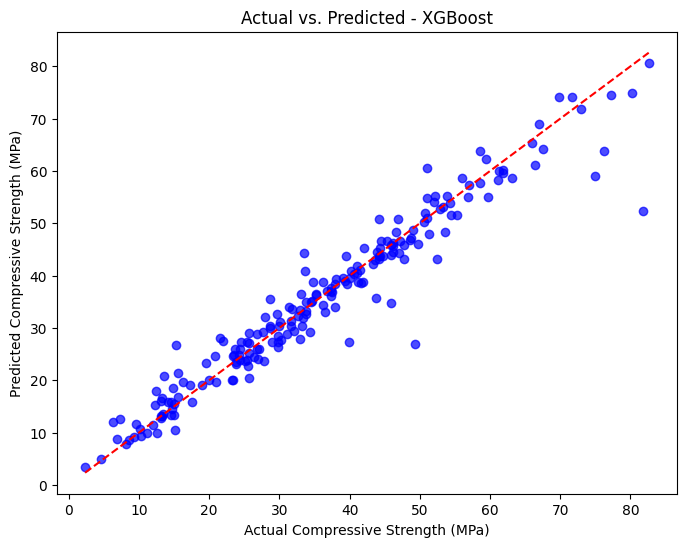

In [5]:
# Select the best model based on R² score
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Best model predictions
y_pred = best_model.predict(X_test_scaled)

# Plotting Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Compressive Strength (MPa)")
plt.ylabel("Predicted Compressive Strength (MPa)")
plt.title(f"Actual vs. Predicted - {best_model_name}")
plt.show()


In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

# Extend the models dictionary with additional models
models.update({
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Extra Trees": ExtraTreesRegressor(random_state=42)
})

# Retrain and evaluate all models
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[model_name] = {"MSE": mse, "MAE": mae, "R2": r2}

# Update the results DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                         MSE       MAE        R2
Linear Regression  88.592072  7.105006  0.703038
Ridge Regression   89.933255  7.196982  0.698543
Lasso Regression   90.074066  7.202226  0.698071
Random Forest      24.247618  3.500173  0.918722
XGBoost            19.366472  2.711429  0.935083
SVR                96.320281  7.325161  0.677133
Decision Tree      35.763532  3.747077  0.880120
Gradient Boosting  27.995770  3.798271  0.906158
KNN Regressor      70.467160  6.267832  0.763793
Extra Trees        23.606428  3.091330  0.920871


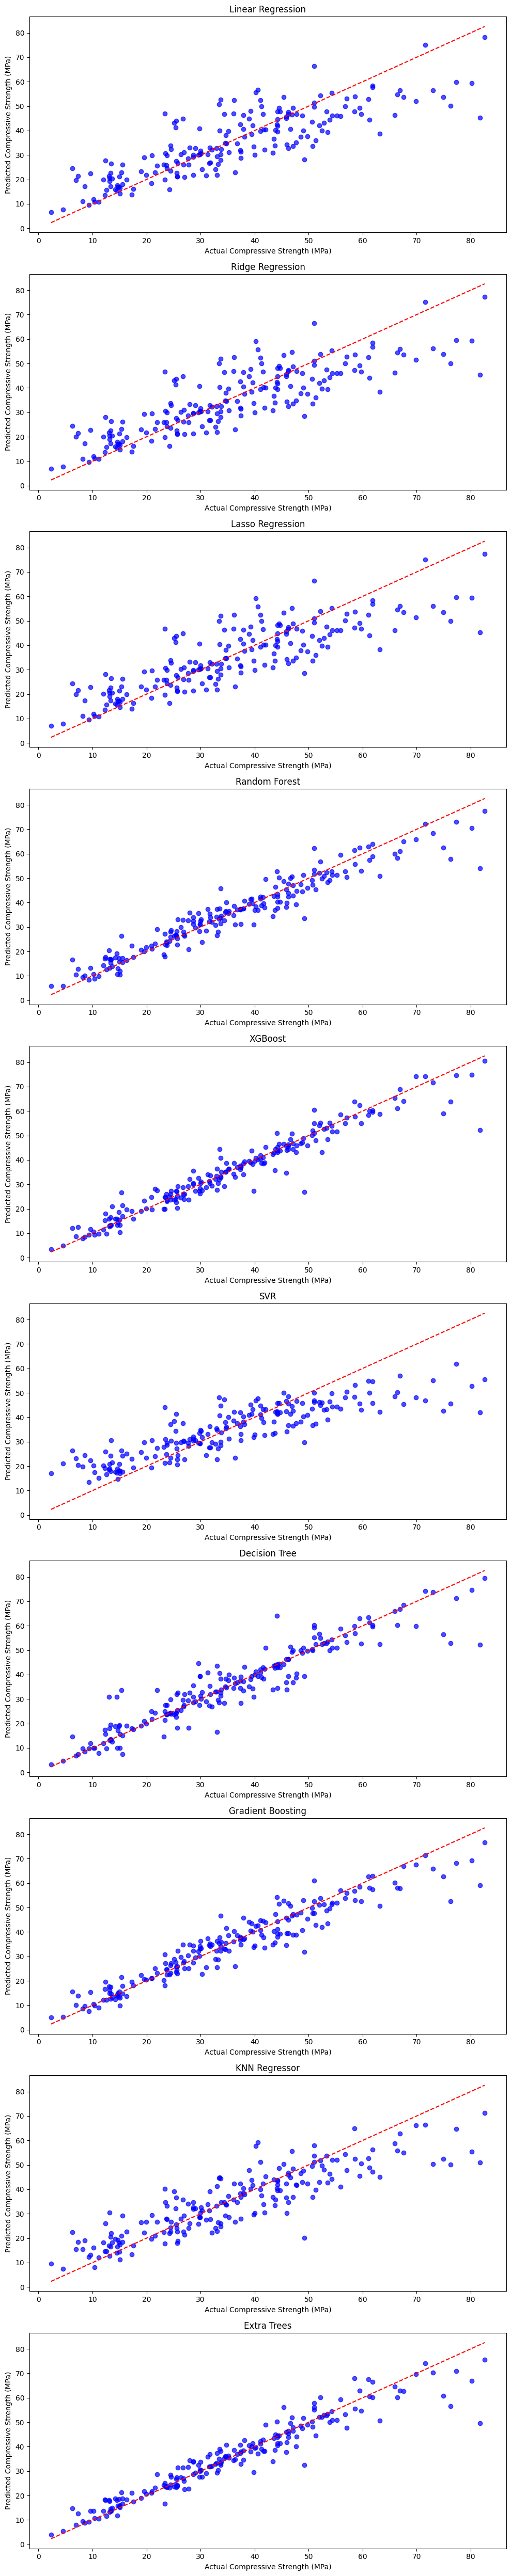

In [8]:
# Plot actual vs. predicted for all models in a single column
plt.figure(figsize=(10, len(models) * 5))

for i, (model_name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test_scaled)
    plt.subplot(len(models), 1, i)
    plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(model_name)
    plt.xlabel("Actual Compressive Strength (MPa)")
    plt.ylabel("Predicted Compressive Strength (MPa)")

plt.tight_layout()
plt.show()


Best Model: XGBoost


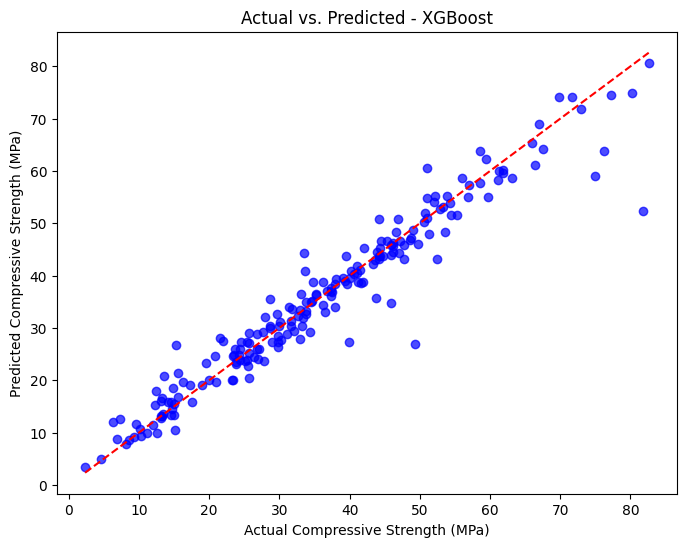

In [9]:
# Select the best model based on R² score
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Best model predictions
y_pred = best_model.predict(X_test_scaled)

# Plotting Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Compressive Strength (MPa)")
plt.ylabel("Predicted Compressive Strength (MPa)")
plt.title(f"Actual vs. Predicted - {best_model_name}")
plt.show()


In [17]:
from scipy.optimize import minimize
import numpy as np

# Cost minimization function
def cost_function(inputs):
    """
    Minimization target: Total cost from dataset.
    """
    return inputs[-1]  # The last feature (cost) is minimized

# Strength constraint
def strength_constraint(inputs):
    """
    Ensure the compressive strength predicted by XGBoost meets the threshold.
    """
    features = inputs[:-1]  # Exclude cost for prediction
    scaled_features = scaler.transform([inputs])  # Scale input features (including cost)
    predicted_strength = best_model.predict(scaled_features)
    return predicted_strength[0] - 35

# Feature bounds (based on your dataset ranges)
bounds = [
    (100, 600),  # Cement
    (0, 300),    # Blast Furnace Slag
    (0, 200),    # Fly Ash
    (140, 250),  # Water
    (0, 30),     # Superplasticizer
    (800, 1200), # Coarse Aggregate
    (600, 1000), # Fine Aggregate
    (1, 365),    # Age (days)
    (50, 300)    # Total Cost (dummy bounds based on dataset)
]

# Initial guess for the optimization
initial_guess = [300, 50, 50, 200, 10, 1000, 800, 28, 100]

# Constraints for optimization
constraints = {
    'type': 'ineq',  # Strength must be greater than or equal to threshold
    'fun': strength_constraint
}

# Fit the scaler on the full data (including Total Cost)
# (Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer, Coarse Aggregate, Fine Aggregate, Age, Total Cost)
scaler.fit(X_train)  # X_train should have 9 features

# Run the optimization
result = minimize(cost_function, initial_guess, bounds=bounds, constraints=constraints, method='SLSQP')

# Display the results
if result.success:
    optimized_features = result.x
    # Display the optimized material quantities and age with feature names
    print(f"Optimized Material Quantities and Age:")
    print(f"Cement: {optimized_features[0]}")
    print(f"Blast Furnace Slag: {optimized_features[1]}")
    print(f"Fly Ash: {optimized_features[2]}")
    print(f"Water: {optimized_features[3]}")
    print(f"Superplasticizer: {optimized_features[4]}")
    print(f"Coarse Aggregate: {optimized_features[5]}")
    print(f"Fine Aggregate: {optimized_features[6]}")
    print(f"Age: {optimized_features[7]}")
    print(f"Optimized Total Cost: {optimized_features[-1]}")

    # Validate the strength of the optimized mix
    scaled_optimized_features = scaler.transform([optimized_features])  # All features, including cost
    predicted_strength = best_model.predict(scaled_optimized_features)
    print(f"Predicted Strength of Optimized Mix: {predicted_strength[0]}")
else:
    print(f"Optimization failed: {result.message}")


Optimized Material Quantities and Age:
Cement: 300.0
Blast Furnace Slag: 50.0
Fly Ash: 50.0
Water: 200.0
Superplasticizer: 10.0
Coarse Aggregate: 1000.0
Fine Aggregate: 800.0
Age: 28.0
Optimized Total Cost: 50.0
Predicted Strength of Optimized Mix: 56.685707092285156


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but 